In [108]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import pickle
from astropy.coordinates import SkyCoord, match_coordinates_3d, match_coordinates_sky
import sys
import emcee
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.table import Table, QTable, hstack, vstack
from astropy import units as u
import corner
from astropy.coordinates import SkyCoord, match_coordinates_3d
cosmo_astropy = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)
import iminuit
from iminuit import Minuit
cosmo_astropy.critical_density(0.4).to(u.Msun / u.Mpc**3).value

sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/modules/')
import CL_WL_miscentering as mis
import analysis_Mass_Richness_relation as analysis
import CL_WL_two_halo_term as twoh
import CL_WL_mass_conversion as utils
import CL_DATAOPS_match_catalogs as match
import CL_WL_DATAOPS_make_profile as prf
import CL_Mass_richness_relation as mr



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## first approach

In [109]:
model =mr.WL_Mass_Richness()

In [110]:
model.set_pivot_values(.4, 40)

In [203]:
thetaMC = [14.1, -.1, 1]
thetaMC_sigma = [.4, .1, .1]
sigma_int = .4
Gamma = .75

In [204]:
def mu_lnM(richness, z):
    return model.mu_logM_lambda(richness, z, thetaMC)*np.log(10)

In [205]:
def sigma_2_lnM(richness, z):
    #sigma_int=model.sigma_mu_logM_lambda(richness, z, thetaMC_sigma)
    return sigma_int**2 + thetaMC[2]**2/richness

In [206]:
def factor(richness, z):
    mu_m = np.exp(mu_lnM(richness, z) + sigma_2_lnM(richness, z)/2)
    sigma_2_m = np.exp(2*mu_lnM(richness, z) + sigma_2_lnM(richness, z))*(np.exp(sigma_2_lnM(richness, z))-1)
    #return mu_m
    return (1+.5*Gamma*(Gamma-1)*sigma_2_m/(mu_m**2))**(-1/Gamma)

Text(0, 0.5, '$\\langle M|\\lambda, z \\rangle/M_{\\rm stack}$')

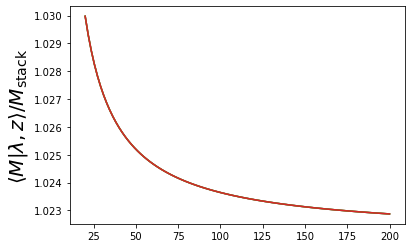

In [207]:
richness = np.linspace(20, 200, 100)
for z in np.linspace(0.2, 1, 4):
    plt.plot(richness, factor(richness, z))
plt.ylabel(r'$\langle M|\lambda, z \rangle/M_{\rm stack}$', fontsize=20)